In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('channel_data.csv')
df = df.fillna(0)

In [6]:
block = np.asarray(df['block'], dtype='uint8')
X = np.asarray(df[df.columns[2:]], dtype='uint8')
y = np.asarray(df['y'], dtype = 'uint8')

print(X.shape, y.shape)

(20000, 1024) (20000,)


In [8]:
Xb = {}
yb = {}
block_set = set(list(block))
for bs in block_set:
    bs_idx = np.where(block == bs)[0]
    Xb[bs] = X[bs_idx]
    yb[bs] = y[bs_idx]

In [63]:
def _get_model(model_type):
    model = None
    if model_type == 'nb-bernoulli':
        from sklearn.naive_bayes import BernoulliNB
        model = BernoulliNB()
    elif model_type == 'nb-gaussian':
        from sklearn.naive_bayes import GaussianNB
        model = GaussianNB()
    elif model_type == 'lda':
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
        model = LinearDiscriminantAnalysis()
        
    return model

def _generate_model(Xx, yy, n_splits, model_type, plot=True):
    from sklearn.model_selection import StratifiedKFold, KFold
    from sklearn.metrics import roc_curve, auc, accuracy_score
    

    model = _get_model(model_type)
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True)
    accs, aucs, fprs, tprs = [], [], [], []
    
    for i, (train, test) in enumerate(cv.split(Xx, yy)):
        model.fit(Xx[train], yy[train])
        
        ypred_proba = model.predict_proba(Xx[test])[:,1]
        ypred = model.predict(Xx[test])
        
        acc = accuracy_score(yy[test], ypred)
        accs.append(acc)
        
        fpr, tpr, thresholds = roc_curve(yy[test], ypred_proba, pos_label=1)
        fprs.append(fpr); tprs.append(tpr)
        auc_v = auc(fpr, tpr)
        aucs.append(auc_v)
        
        plt.figure()
        plt.plot(fpr, tpr, label='auc: %0.3f. acc: %0.3f' % (auc_v, acc), color='k')
        plt.plot(np.linspace(0,1,50), np.linspace(0,1,50), color='r', linestyle='--')
        plt.legend()
        plt.xlabel('false positive rate'); plt.ylabel('true positive rate')
        plt.show()

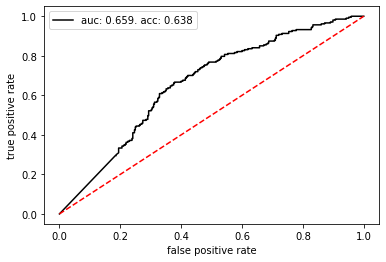

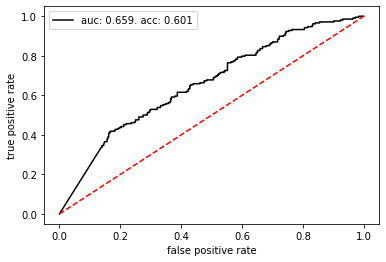

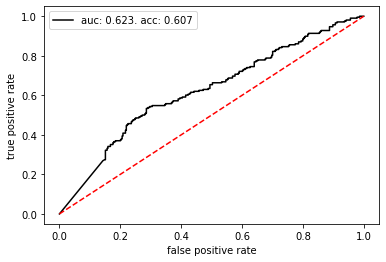

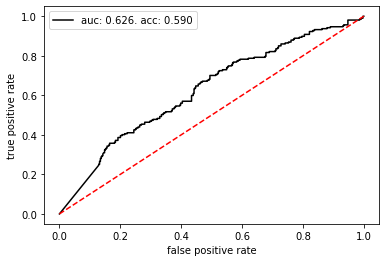

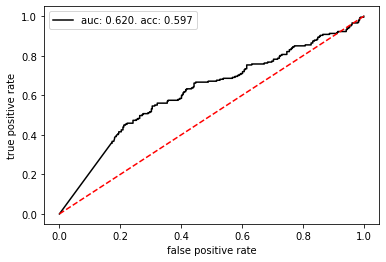

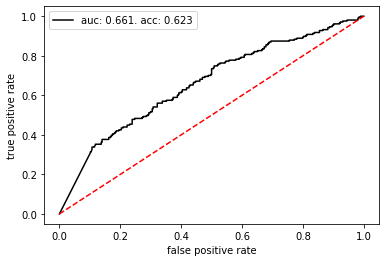

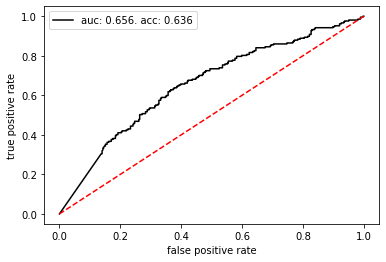

In [58]:
_generate_model(Xb[0], yb[0], n_splits = 7, model_type = 'nb-gaussian')

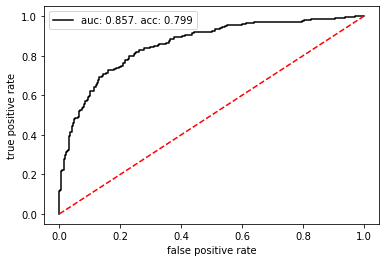

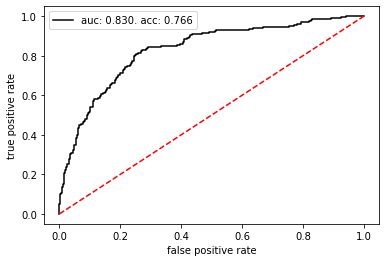

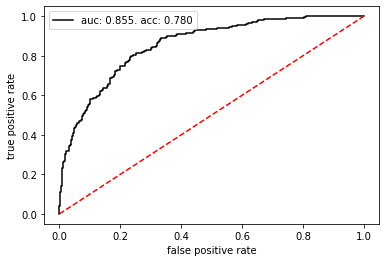

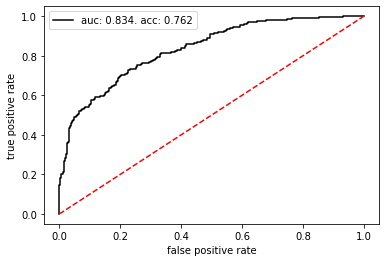

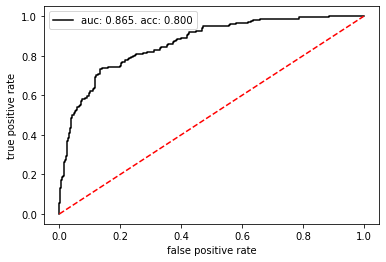

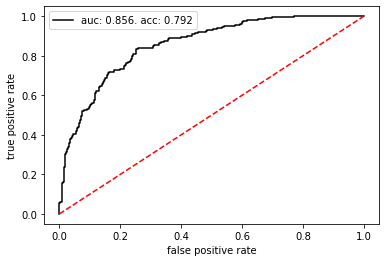

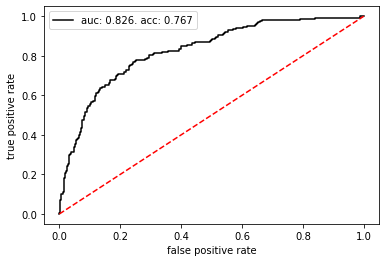

In [59]:
_generate_model(Xb[0], yb[0], n_splits = 7, model_type = 'nb-bernoulli')

235


Text(0, 0.5, '% variance explained')

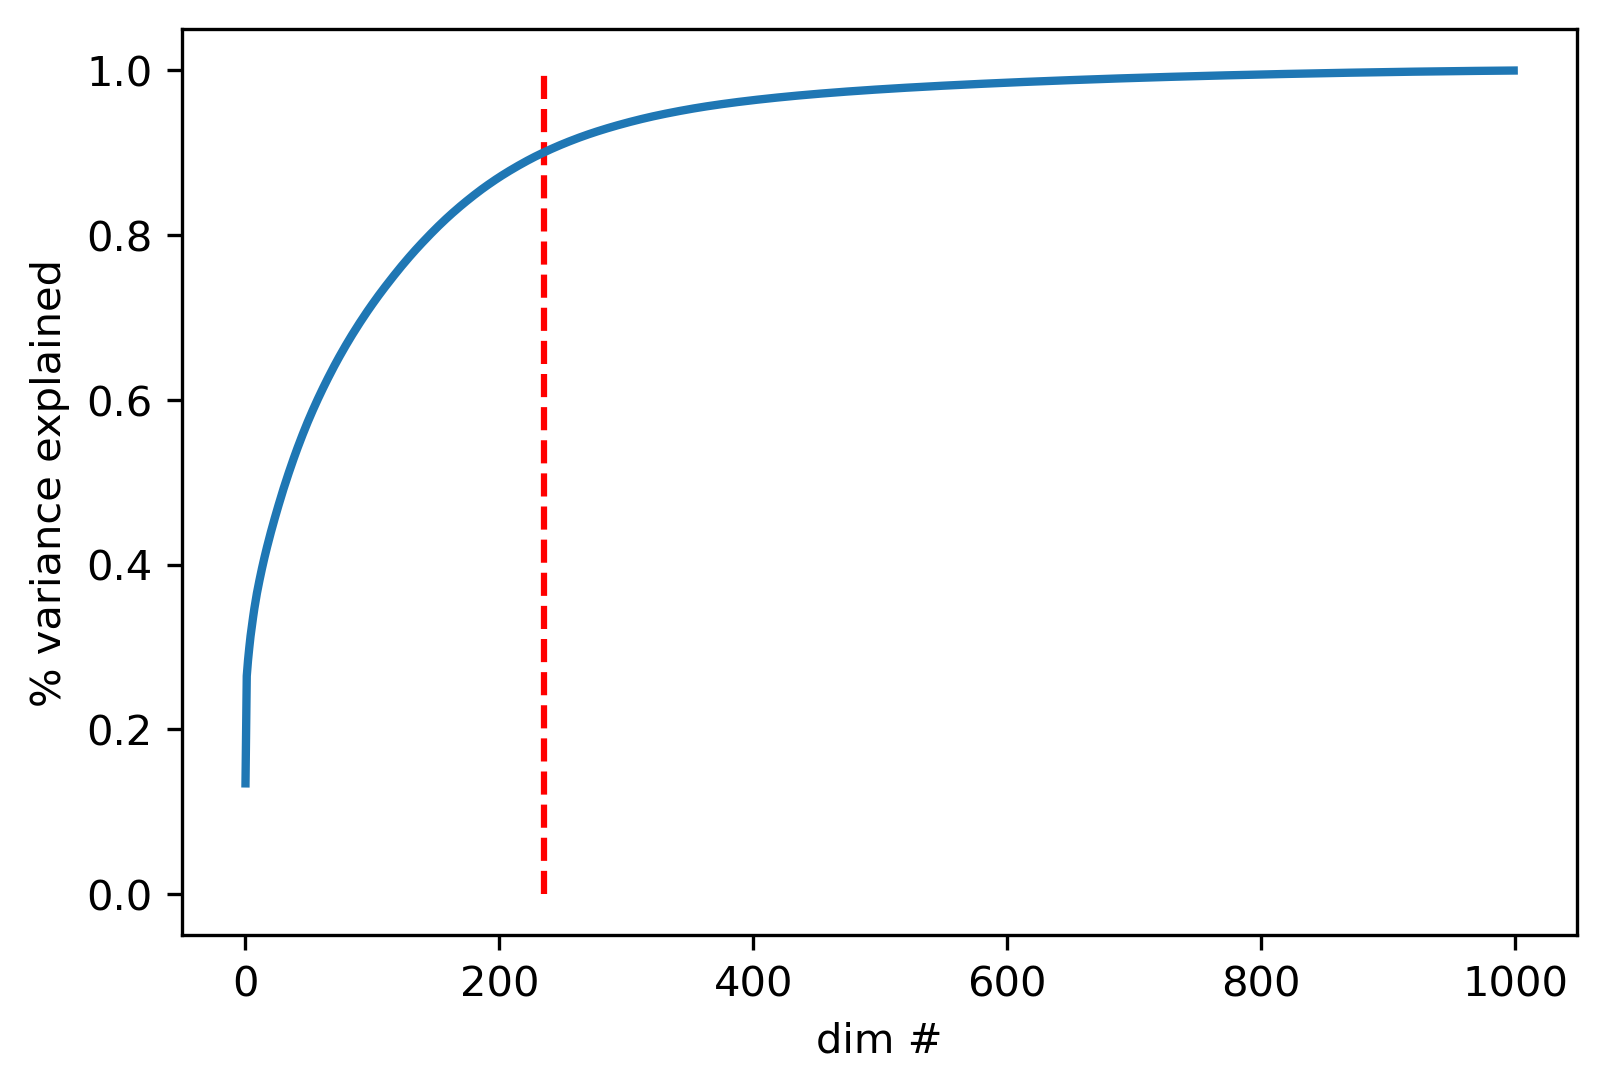

In [60]:
from sklearn.decomposition import PCA

pca_X0 = PCA(n_components=1000)
X0reduced = pca_X0.fit_transform(Xb[0])

v_cumsum = np.cumsum(pca_X0.explained_variance_ratio_)
v_90 = np.where(v_cumsum > 0.90)[0][0]
print(v_90)

plt.figure(dpi=300)
plt.plot(v_cumsum, linewidth=2)
plt.vlines(v_90, 0, 1, linestyles='--', color='r')
plt.xlabel('dim #')
plt.ylabel("% variance explained")

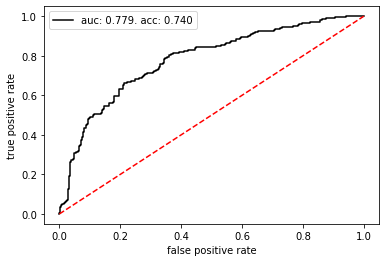

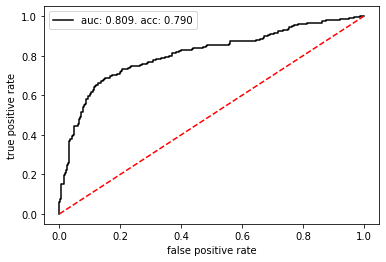

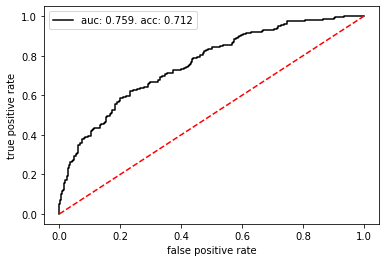

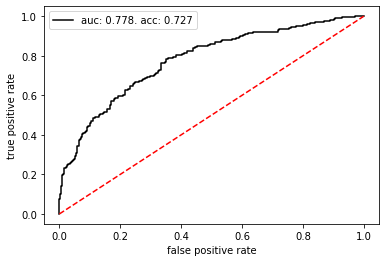

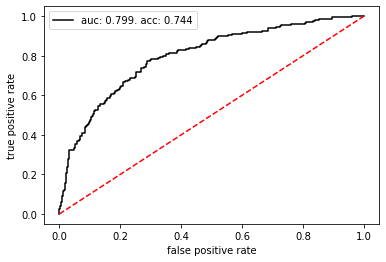

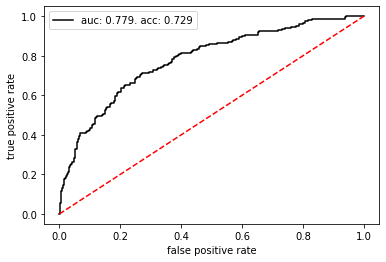

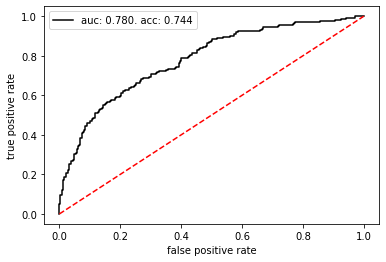

In [61]:
_generate_model(X0reduced[:,:235], yb[0], n_splits = 7, model_type = 'nb-bernoulli')

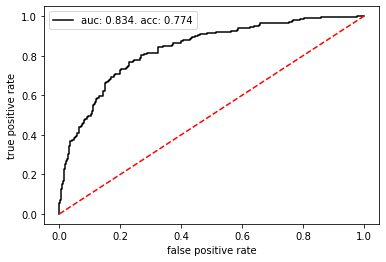

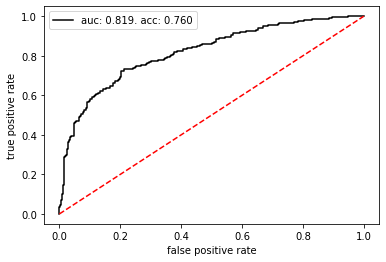

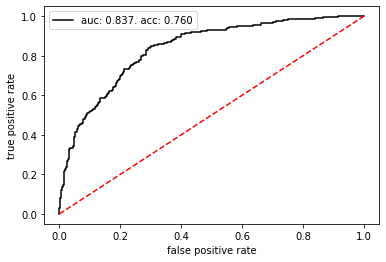

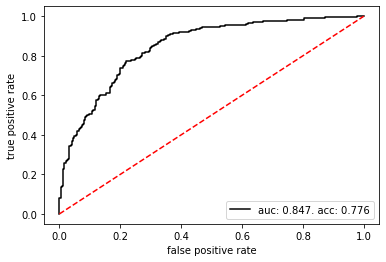

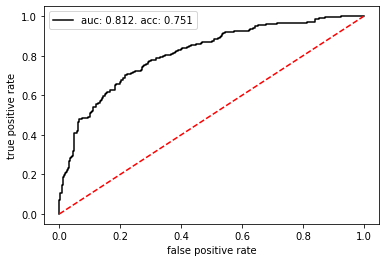

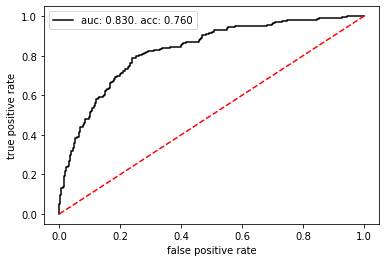

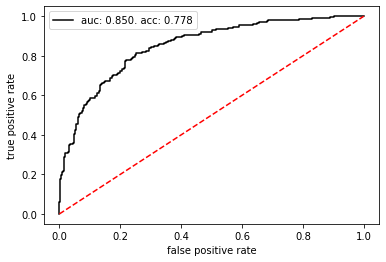

In [62]:
_generate_model(X0reduced[:,:235], yb[0], n_splits = 7, model_type = 'nb-gaussian')

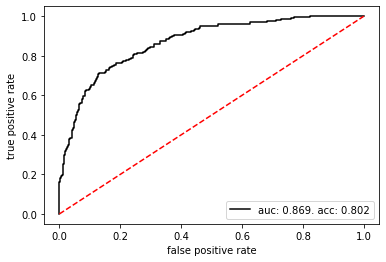

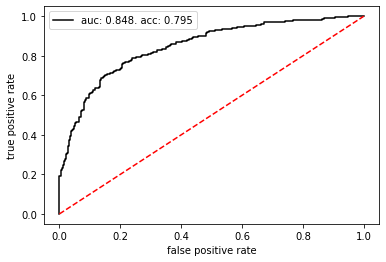

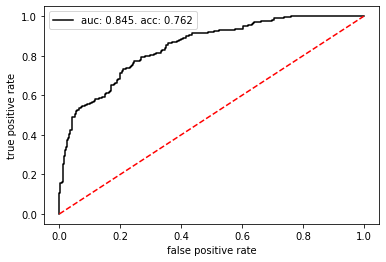

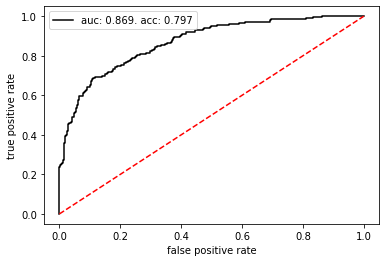

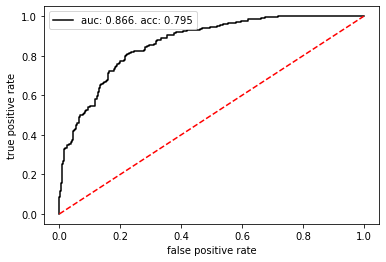

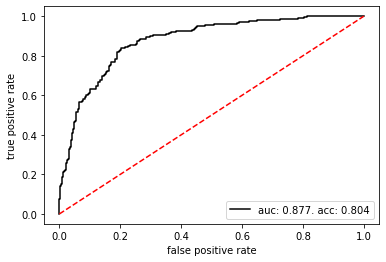

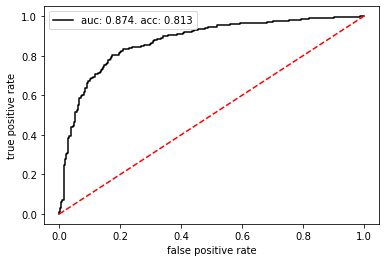

In [64]:
_generate_model(X0reduced[:,:235], yb[0], n_splits = 7, model_type = 'lda')